In [1]:
from cc_groq import GroqContextCiter
context = """
Attention Is All You Need

Abstract
The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new single-model state-of-the-art BLEU score of 41.8 after training for 3.5 days on eight GPUs, a small fraction of the training costs of the best models from the literature. We show that the Transformer generalizes well to other tasks by applying it successfully to English constituency parsing both with large and limited training data.
1 Introduction
Recurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and transduction problems such as language modeling and machine translation [35, 2, 5]. Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures [38, 24, 15].
Recurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states ht, as a function of the previous hidden state ht-1 and the input for position t. This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. Recent work has achieved significant improvements in computational efficiency through factorization tricks [21] and conditional computation [32], while also improving model performance in case of the latter. The fundamental constraint of sequential computation, however, remains.
Attention mechanisms have become an integral part of compelling sequence modeling and transduction models in various tasks, allowing modeling of dependencies without regard to their distance in the input or output sequences [2, 19]. In all but a few cases [27], however, such attention mechanisms are used in conjunction with a recurrent network.
In this work we propose the Transformer, a model architecture eschewing recurrence and instead relying entirely on an attention mechanism to draw global dependencies between input and output. The Transformer allows for significantly more parallelization and can reach a new state of the art in translation quality after being trained for as little as twelve hours on eight P100 GPUs.
"""
query = "What type of GPUs did the authors use in this paper?"

cc = GroqContextCiter(groq_model='llama3-8b-8192', context=context, query=query, num_ablations=32)
# %%
cc.response

masks, outputs = cc._cosine_sim(0, len(cc.response)) # (num_ablations,)

/Users/johnyang/miniforge3/envs/ccg/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/johnyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
 34%|███▍      | 11/32 [00:00<00:00, 47.53it/s][nltk_data] Downloading package punkt to /Users/johnyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/johnyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/johnyang/nltk_data...
[nltk_data] Downloading package punkt to /Users/johnyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/johnyang/nltk_data...
[nltk_da

In [6]:
weight, bias = cc.solver.fit_cv(masks, outputs, alphas=[0.001, 0.0001])

Best alpha selected: 0.001


In [7]:
weight, bias

(array([-0.05529358,  0.06523213,  0.0766981 ,  0.02787049,  0.01996927,
         0.07506782,  0.03231947,  0.01253854,  0.01603531,  0.14304488,
        -0.0248171 ,  0.01618369,  0.06610643,  0.02520952, -0.04075007,
         0.02465776, -0.10915447,  0.05641357,  0.05461961, -0.06637193]),
 0)

In [8]:
cc.context

'\nAttention Is All You Need\n\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new single-model state-of-the-art BLEU score of 41.8 after training for 3.5 days on eight GPUs, a small fraction of the training costs of the best models fro

In [10]:
import numpy as np

# Load the saved masks and cosine similarities
cosine_sims = np.load("../cosine_sims.npy")
masks = np.load("../masks.npy")

# Print the shapes to verify the data
print(f"Cosine Similarities Shape: {cosine_sims.shape}")
print(f"Masks Shape: {masks.shape}")


Cosine Similarities Shape: (128,)
Masks Shape: (128, 20)


In [18]:
masks[: , -1]

array([ True,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True, False, False, False,  True, False, False, False, False,
        True,  True, False, False,  True,  True, False, False, False,
        True, False,  True, False, False,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False]

In [19]:
import pandas as pd

# Create a DataFrame with the cosine similarities and masks
data = {
    'context': [cc.partitioner.get_context(mask) for mask in masks],
    'cosine_similarities': cosine_sims,
    'masks': masks[:, -1]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)


In [20]:
df

,context,cosine_similarities,masks
0,Attention Is All You Need\n\nAbstract\nThe dom...,0.703759,True
1,Attention Is All You Need\n\nAbstract The best...,0.588415,True
2,The dominant sequence transduction models are ...,0.524443,False
3,The dominant sequence transduction models are ...,0.488195,False
4,The best performing models also connect the en...,0.690663,False
...,...,...,...
123,Abstract The best performing models also conne...,0.693390,True
124,Abstract\nThe dominant sequence transduction m...,0.690639,True
125,Attention Is All You Need\nThe dominant sequen...,0.582765,False
126,The dominant sequence transduction models are ...,0.622305,False


In [21]:
# Sort the DataFrame by cosine similarities in descending order
df = df.sort_values(by='cosine_similarities', ascending=False)


In [22]:
df

,context,cosine_similarities,masks
18,Abstract\nThe dominant sequence transduction m...,0.828172,True
91,Attention Is All You Need The best performing ...,0.802390,False
55,Abstract The best performing models also conne...,0.802390,True
121,Abstract The best performing models also conne...,0.802390,True
93,Attention Is All You Need On the WMT 2014 Engl...,0.802390,False
...,...,...,...
88,Abstract The best performing models also conne...,0.489879,True
3,The dominant sequence transduction models are ...,0.488195,False
12,Attention Is All You Need\nThe dominant sequen...,0.479876,False
64,Abstract Experiments on two machine translatio...,0.476136,False


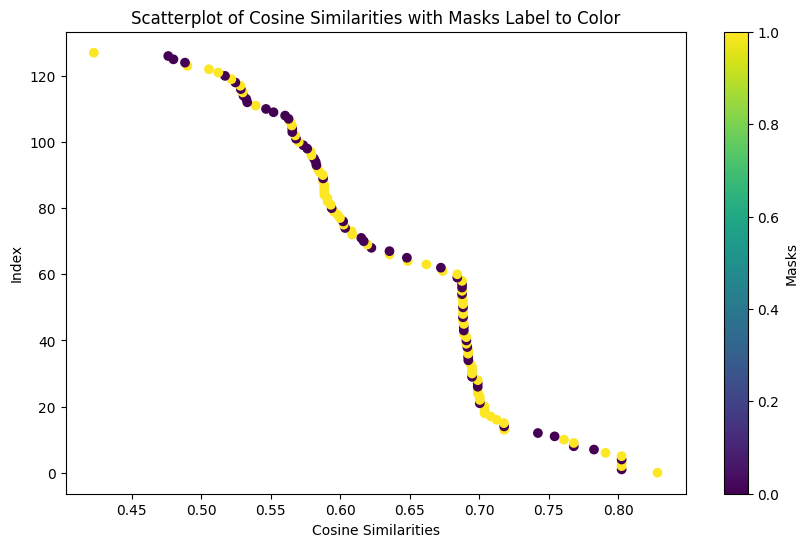

In [23]:
import matplotlib.pyplot as plt

# Plot scatterplot of cosine similarities with masks label to color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['cosine_similarities'], range(len(df)), c=df['masks'], cmap='viridis', label=df['masks'])
plt.colorbar(scatter, label='Masks')
plt.xlabel('Cosine Similarities')
plt.ylabel('Index')
plt.title('Scatterplot of Cosine Similarities with Masks Label to Color')
plt.show()

In [ ]:
cc.partitioner.get_context(mask)

In [5]:
cosine_sims

array([0.70375943, 0.58841527, 0.52444327, 0.48819467, 0.6906631 ,
       0.68825513, 0.68755376, 0.635332  , 0.562724  , 0.6920644 ,
       0.6919276 , 0.5280122 , 0.4798759 , 0.60235214, 0.7003183 ,
       0.5876734 , 0.5169804 , 0.42258874, 0.82817185, 0.6988414 ,
       0.60807484, 0.58103955, 0.59082407, 0.60341424, 0.76794076,
       0.71785724, 0.58841527, 0.5675518 , 0.68755376, 0.6988414 ,
       0.5390142 , 0.7003183 , 0.80239034, 0.5283355 , 0.5215739 ,
       0.6484661 , 0.647852  , 0.6841232 , 0.68825513, 0.6888183 ,
       0.59314823, 0.5885009 , 0.5937017 , 0.67361176, 0.5680839 ,
       0.5302841 , 0.6888183 , 0.58841527, 0.6194014 , 0.50541353,
       0.5297793 , 0.5980575 , 0.68755376, 0.6888183 , 0.68825513,
       0.80239034, 0.6988414 , 0.57919776, 0.6988414 , 0.5875684 ,
       0.7176773 , 0.69474304, 0.5996979 , 0.69474304, 0.47613633,
       0.68825513, 0.7824988 , 0.58486843, 0.6019949 , 0.635332  ,
       0.5121372 , 0.5650554 , 0.7421419 , 0.5907363 , 0.68881

In [4]:
import matplotlib.pyplot as plt

# Assuming 'results' is a DataFrame with the attributions data
results.plot(kind='bar', x='feature', y='importance', legend=False)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances')
plt.show()


Matplotlib is building the font cache; this may take a moment.


NameError: name 'results' is not defined